# <center> Série Temporal com Covid-19 - Aplicando na base de recuperados </center>
## Professor: Victor Venites
## Data: 11/04/2020
## Aula: Especial 04

# Por quê Séries Temporais?
R: Devido ao aumento da complexidade pelo grande número de dados; soluções aleatórias para problemas diversos, e as vezes, aleatórios; 'matemática dinâmica' - decodificação contínua, procurar métodos diferentes e que ajudem a encontrar soluções aceitáveis para poder analisar dados em função do tempo, e quando eles não tem a coluna X.</n>
# Qual a série com maior quantidade?
R: China com 64236 recuperados.

# Por que juntar os países?
R: Para facilitar na nossa previsão.


## 1. Importando as Bibliotecas de Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Carregando as bases de Dados
- Você pode usar comandos do prompt de comando direto no jupyter

In [2]:
!dir

 O volume na unidade C nÆo tem nome.
 O N£mero de S‚rie do Volume ‚ A49B-002B

 Pasta de C:\Users\user\Aula4-especial

19/04/2020  18:11    <DIR>          .
19/04/2020  18:11    <DIR>          ..
19/04/2020  01:51    <DIR>          .ipynb_checkpoints
18/04/2020  18:46         1.671.469 2020_AulaEspecial04_SerieTemporalCovid19_VictorVenites_EscolaLivreIA_Slides.pdf
19/04/2020  00:46            67.643 AulaEspecial04_SerieTemporal_Covid19_Prof.VictorVenites_EscolaLivreIA_Python-checkpoint.ipynb
18/04/2020  20:05             5.311 AulaEspecial04_SerieTemporal_Covid19_Prof.VictorVenites_EscolaLivreIA_Python.ipynb
19/04/2020  18:11           156.566 exerc¡cio.ipynb
18/04/2020  18:47               335 Jupyter_Python.bat
18/04/2020  18:47            65.331 time_series_covid19_confirmed_global.csv
18/04/2020  18:47            52.985 time_series_covid19_deaths_global.csv
18/04/2020  18:47            55.120 time_series_covid19_recovered_global.csv
18/04/2020  22:43                72 Untitled.ipyn

In [3]:
pwd

'C:\\Users\\user\\Aula4-especial'

In [4]:
DataFrame = pd.read_csv("time_series_covid19_recovered_global.csv")
DataFrame.iloc[:3,:5]

,Province/State,Country/Region,Lat,Long,1/22/20
0,NaN,Afghanistan,33.0000,65.0000,0
1,NaN,Albania,41.1533,20.1683,0
2,NaN,Algeria,28.0339,1.6596,0


In [5]:
DataFrame = pd.read_csv("time_series_covid19_recovered_global.csv")
DataFrame.iloc[:,83:]

,4/10/20
0,32
1,182
2,405
3,71
4,2
...,...
245,0
246,0
247,0
248,0


## 3. Análise Exploratória

In [6]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 84 columns):
Province/State    67 non-null object
Country/Region    250 non-null object
Lat               250 non-null float64
Long              250 non-null float64
1/22/20           250 non-null int64
1/23/20           250 non-null int64
1/24/20           250 non-null int64
1/25/20           250 non-null int64
1/26/20           250 non-null int64
1/27/20           250 non-null int64
1/28/20           250 non-null int64
1/29/20           250 non-null int64
1/30/20           250 non-null int64
1/31/20           250 non-null int64
2/1/20            250 non-null int64
2/2/20            250 non-null int64
2/3/20            250 non-null int64
2/4/20            250 non-null int64
2/5/20            250 non-null int64
2/6/20            250 non-null int64
2/7/20            250 non-null int64
2/8/20            250 non-null int64
2/9/20            250 non-null int64
2/10/20           250 non-null int64
2/

In [7]:
DataFrame.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
count,250.000000,250.000000,250.000000,250.000000,250.0000,250.00000,250.00000,250.00000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,20.048575,27.934869,0.112000,0.120000,0.1440,0.15600,0.20800,0.24400,0.428000,0.504000,...,772.708000,841.052000,903.184000,984.608000,1040.048000,1106.060000,1200.216000,1314.644000,1415.900000,1504.384000
std,24.394560,67.432156,1.770875,1.774881,1.9664,2.03278,2.66555,2.86939,5.090034,5.599231,...,4699.801122,4907.434102,5098.780571,5338.962605,5546.156825,5742.144926,6105.529052,6634.364417,7057.018413,7368.006518
min,-51.796300,-106.346800,0.000000,0.000000,0.0000,0.00000,0.00000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.677575,-8.091400,0.000000,0.000000,0.0000,0.00000,0.00000,0.00000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,4.000000,4.000000,4.000000
50%,21.805100,22.380900,0.000000,0.000000,0.0000,0.00000,0.00000,0.00000,0.000000,0.000000,...,12.000000,18.000000,21.000000,24.500000,28.000000,33.000000,39.500000,40.000000,47.500000,53.000000
75%,39.376275,87.379325,0.000000,0.000000,0.0000,0.00000,0.00000,0.00000,0.000000,0.000000,...,93.500000,109.750000,127.000000,131.000000,141.750000,162.000000,173.000000,202.750000,249.000000,278.750000
max,71.706900,178.065000,28.000000,28.000000,31.0000,32.00000,42.00000,45.00000,80.000000,88.000000,...,63326.000000,63471.000000,63612.000000,63762.000000,63945.000000,64014.000000,64073.000000,64142.000000,64187.000000,64236.000000


In [8]:
DataFrame.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20',
       '4/9/20', '4/10/20'

In [9]:
# Isolando países ('Country/Region') e a última data de contagem de recuperados('4/10/20') 
Recuperados = DataFrame.copy()
Recuperados.drop(columns = ['Province/State', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20',
       '4/9/20'], inplace = True)
Recuperados

,Country/Region,4/10/20
0,Afghanistan,32
1,Albania,182
2,Algeria,405
3,Andorra,71
4,Angola,2
...,...,...
245,France,0
246,South Sudan,0
247,Western Sahara,0
248,Sao Tome and Principe,0


In [10]:
#Ordenando pela quantidade de recuperados para identificar o país com mais recuperados
Recuperados.sort_values('4/10/20', ascending = True)

,Country/Region,4/10/20
249,Yemen,0
24,Belize,0
222,United Kingdom,0
214,Uganda,0
37,Central African Republic,0
...,...,...
131,Italy,30455
127,Iran,35465
112,Germany,53913
199,Spain,55668


In [11]:
#Apagar colunas que não vai utilizar
Serie_Temporal = DataFrame.copy()
Serie_Temporal.drop(columns = ["Province/State","Country/Region","Lat","Long"], inplace = True)
Serie_Temporal

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
0,0,0,0,0,0,0,0,0,0,0,...,5,10,10,10,15,18,18,29,32,32
1,0,0,0,0,0,0,0,0,0,0,...,67,76,89,99,104,116,131,154,165,182
2,0,0,0,0,0,0,0,0,0,0,...,61,61,62,90,90,90,113,237,347,405
3,0,0,0,0,0,0,0,0,0,0,...,10,10,16,21,26,31,39,52,58,71
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4. Juntando tudo em 1 série Temporal

In [12]:
Serie_Geral = Serie_Temporal.sum().copy()
Serie_Geral = pd.DataFrame(Serie_Geral)
Serie_Geral.rename(columns = {0 : "y"}, inplace = True)
Serie_Geral.head()

,y
1/22/20,28
1/23/20,30
1/24/20,36
1/25/20,39
1/26/20,52


## 5. Todos a PArtir do Tempo 0

In [13]:
#Conversão para index para pandas reconhecer
Serie_Geral.index = pd.to_datetime(Serie_Geral.index)

In [14]:
Serie_Geral.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 80 entries, 2020-01-22 to 2020-04-10
Data columns (total 1 columns):
y    80 non-null int64
dtypes: int64(1)
memory usage: 1.2 KB


In [15]:
Serie_Geral.index.day

Int64Index([22, 23, 24, 25, 26, 27, 28, 29, 30, 31,  1,  2,  3,  4,  5,  6,  7,
             8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
            25, 26, 27, 28, 29,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,
            13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
            30, 31,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
           dtype='int64')

In [16]:
tempos = list(range(Serie_Geral.shape[0]))
Serie_Geral["tempos"] = tempos
Serie_Geral

,y,tempos
2020-01-22,28,0
2020-01-23,30,1
2020-01-24,36,2
2020-01-25,39,3
2020-01-26,52,4
...,...,...
2020-04-06,276515,75
2020-04-07,300054,76
2020-04-08,328661,77
2020-04-09,353975,78


In [17]:
#Criar novas colunas "Dia" e "Dia_da_Semana"
Serie_Geral["Dia"] = Serie_Geral.index.day
Serie_Geral["Dia_da_Semana"] = Serie_Geral.index.dayofweek
# de 0 a 6 -> onde 0 é segunda
Serie_Geral.head()

,y,tempos,Dia,Dia_da_Semana
2020-01-22,28,0,22,2
2020-01-23,30,1,23,3
2020-01-24,36,2,24,4
2020-01-25,39,3,25,5
2020-01-26,52,4,26,6


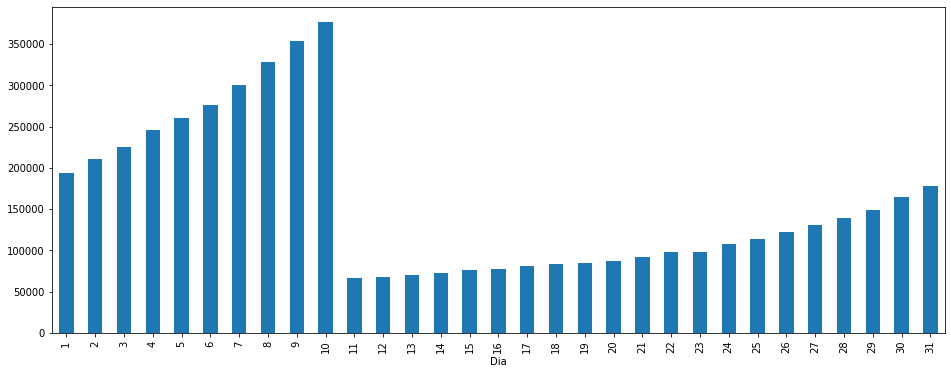

In [18]:
Serie_Geral.groupby("Dia")["y"].max().plot.bar(figsize = (16,6))

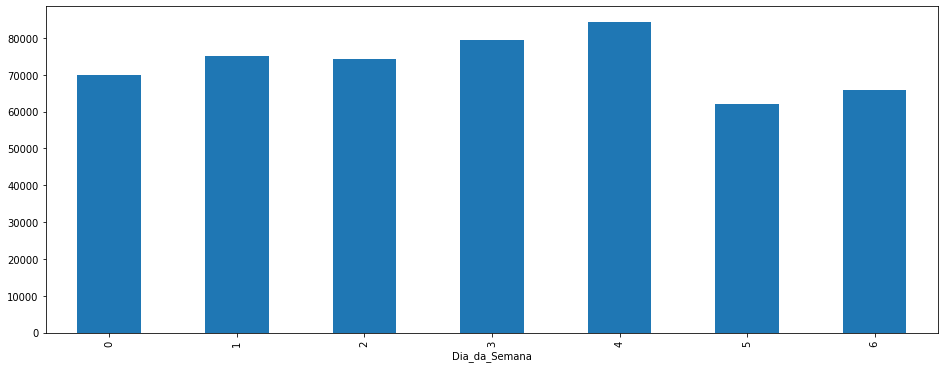

In [19]:
Serie_Geral.groupby("Dia_da_Semana")["y"].mean().plot.bar(figsize = (16,6))

In [20]:
Serie_Geral.describe()

,y,tempos,Dia,Dia_da_Semana
count,80.000000,80.0000,80.000000,80.000000
mean,73230.350000,39.5000,15.637500,3.000000
std,91158.358234,23.2379,9.344658,1.980922
min,28.000000,0.0000,1.000000,0.000000
25%,4498.750000,19.7500,7.000000,1.000000
50%,44159.000000,39.5000,15.500000,3.000000
75%,93243.750000,59.2500,24.000000,5.000000
max,376096.000000,79.0000,31.000000,6.000000


In [21]:
#Criar ciclos, períodos sazonais -> Para que modelo de regressão consiga entender esses ciclos
dummies_Dia_Semana = pd.get_dummies(Serie_Geral["Dia_da_Semana"], drop_first = True)
Serie_Geral = pd.concat([Serie_Geral, dummies_Dia_Semana], axis = 1)
dummies_Dia = pd.get_dummies(Serie_Geral["Dia"], drop_first = True)
Serie_Geral = pd.concat([Serie_Geral, dummies_Dia], axis = 1)
Serie_Geral.drop(columns = 31, inplace = True)
Serie_Geral.iloc[:3, :]

,y,tempos,Dia,Dia_da_Semana,1,2,3,4,5,6,...,21,22,23,24,25,26,27,28,29,30
2020-01-22,28,0,22,2,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2020-01-23,30,1,23,3,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2020-01-24,36,2,24,4,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [22]:
#Autoregressão
Serie_Geral["Anterior"] = Serie_Geral["y"].shift(5)
Serie_Geral = Serie_Geral.iloc[5:]
Serie_Geral.head()

,y,tempos,Dia,Dia_da_Semana,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,Anterior
2020-01-27,61,5,27,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,28.0
2020-01-28,107,6,28,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,30.0
2020-01-29,126,7,29,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,36.0
2020-01-30,143,8,30,3,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,39.0
2020-01-31,222,9,31,4,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,52.0


## 6. Previsão da por Soma Cumulativa

In [23]:
Serie_Geral.shape

(75, 40)

In [34]:
Taxa_Treino = 0.90
X_Treino = Serie_Geral.iloc[:round(Serie_Geral.shape[0] * Taxa_Treino), 1:]
X_Teste = Serie_Geral.iloc[round(Serie_Geral.shape[0] * Taxa_Treino):, 1:]

Y_Treino = Serie_Geral.iloc[:round(Serie_Geral.shape[0] * Taxa_Treino), 0]
Y_Teste = Serie_Geral.iloc[round(Serie_Geral.shape[0] * Taxa_Treino):, 0]
len(Y_Teste)

7

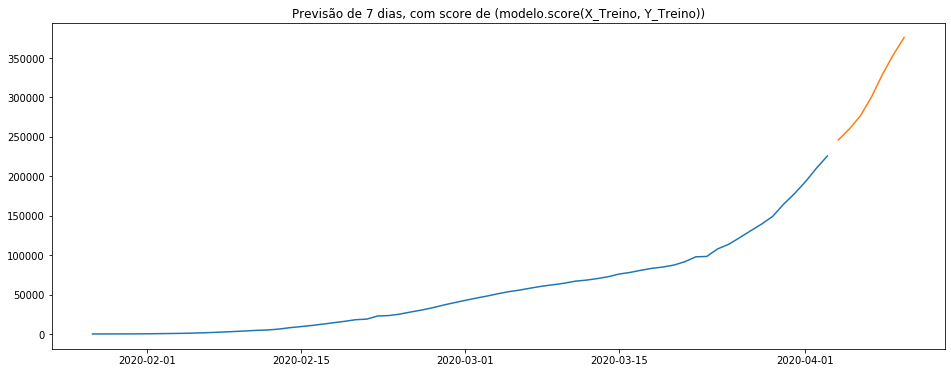

In [35]:
plt.figure(figsize = (16,6))
plt.title(f"Previsão de {len(Y_Teste)} dias, com score de (modelo.score(X_Treino, Y_Treino))")
plt.plot(Y_Treino)
plt.plot(Y_Teste)
plt.show()

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
modelo = LinearRegression().fit(X_Treino, Y_Treino)
modelo

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
modelo.score(X_Treino, Y_Treino)

0.9869427385217621

In [39]:
modelo.coef_, modelo.intercept_

(array([-9.81268133e+01, -5.40527846e+01,  6.21065675e+02,  1.00204074e+03,
         2.95239218e+03,  3.16827370e+03,  2.05001262e+03, -8.04281036e+02,
        -3.32820430e+03,  2.31417028e+03,  2.56981502e+03, -6.94049708e+03,
        -9.20608937e+03, -1.00646488e+04, -9.14917046e+03, -7.36495972e+03,
        -7.02526344e+03, -8.16912473e+03, -1.01158635e+04, -1.28451464e+04,
        -1.33459463e+04, -1.14274655e+04, -8.62697623e+03, -7.85255847e+03,
        -7.30536432e+03, -9.23898638e+03, -1.19145036e+04, -1.29406883e+04,
        -1.13501513e+04, -7.09724676e+03, -8.22614446e+03, -5.30161619e+03,
        -6.10429880e+03, -5.65768542e+03, -6.46179325e+03, -2.38747336e+03,
        -2.71935789e+03, -6.12295023e+02,  1.37307284e+00]), 7655.767308282302)

In [40]:
Previsto = modelo.predict(X_Teste)
Previsto = Previsto.round()
df_Previsão = X_Teste.copy()
df_Previsão[0] = Previsto
df_Previsão = df_Previsão.loc[:, 0]
df_Previsão

2020-04-04    221598.0
2020-04-05    235770.0
2020-04-06    255153.0
2020-04-07    281000.0
2020-04-08    306532.0
2020-04-09    335506.0
2020-04-10    352744.0
Name: 0, dtype: float64

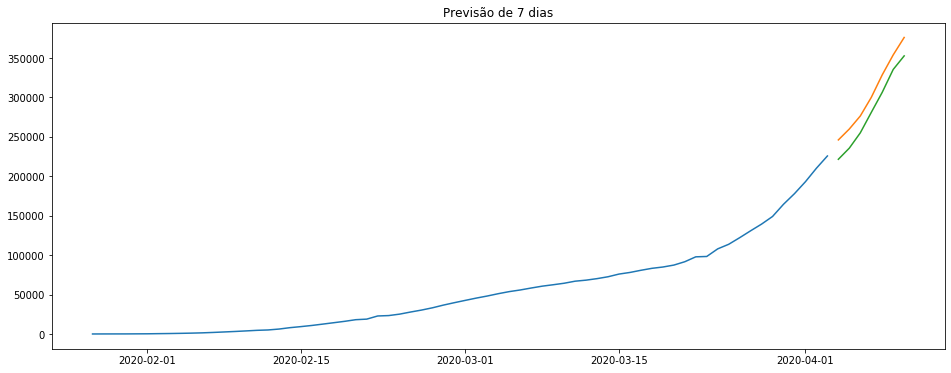

In [41]:
plt.figure(figsize = (16,6))
plt.title(f"Previsão de {len(Y_Teste)} dias")
plt.plot(Y_Treino)
plt.plot(Y_Teste)
plt.plot(df_Previsão)
plt.show()

## 7. Previsão por Quantidade ao LinearRegression

## 8. Executando testes através do tempo

In [32]:
def sliding_windows(data, seq_length):
    xs = []
    ys = []
    
    for i in range(len(data) - seq_length - 1):
        x = data[i:(i + seq_length)]
        y = data[i:seq_length]
        xs.append(x)
        ys.append(y)
    
    return np.array(xs), np.array(ys)

In [33]:
seq_length = 5



## 9. Analisar Distância Percorrida pelo Virus em cada dia Zero

## 10. Correlacionar Casos vs Mortes vs Recuperados

## 11. Visualizar em Gráfico Animado

## 12. Gráfico Animado no MapaMundi
- Gostei da idéia do Panel que usa Bokeh e Ipython Widghet para animar mapas